<a href="https://colab.research.google.com/github/AishwaryaPonni/garbage-classifier/blob/main/garbage_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import numpy as np

#import tensorflow to use any tools needed for deep learning
import tensorflow as tf

#import keras api needed to implement deep learning techiques
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#import libraries for visualization of data
import matplotlib.pyplot as plt

#Allow charts and graphics to display right below the page of browser setup
%matplotlib inline

In [ ]:
train_path = '/content/gdrive/MyDrive/Kaggle/Garbage classification/Garbage classification'
valid_path = '/content/gdrive/MyDrive/Kaggle/Garbage classification/Garbage classification'


# extract images to training set by applying data preprocessing and data augmentation
train_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    validation_split=0.1).flow_from_directory(
    directory=train_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='training')


# extract images to validation set
valid_batches = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input,
    validation_split=0.1).flow_from_directory(
    directory=valid_path, target_size=(224,224), classes=['cardboard', 'glass', 'metal', 
                                                         'paper', 'plastic', 'trash'], batch_size=16, subset='validation')

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [ ]:
def plotImages(images):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images, axes):
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

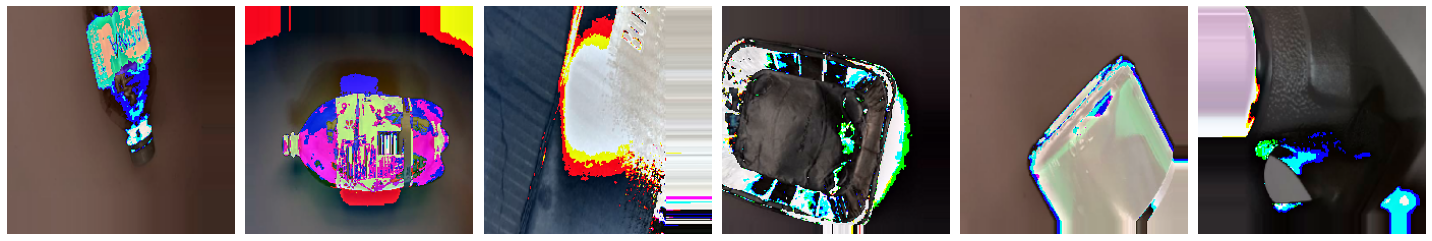

In [ ]:
imgs, labels = next(train_batches)
plotImages(imgs)

In [ ]:
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# import the convolution base of the VGG16 model with pre-trained weights
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE, 
                                        include_top=False,
                                        weights='imagenet')

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
# Initialize a sequential model to group a linear stack of layers
model = Sequential()

# Freeze the convolutional base of VGG16 to prevent the pre-trained weights being updated 
# during training inorder to extract features
base_model.trainable=False

# add VGG16 convolution base to initialize sequential model
model.add(base_model)

# add global average pooling layer
model.add(GlobalAveragePooling2D())

# add densely-connected NN layer with 512 hidden units
model.add(Dense(units=512, activation='relu'))  # use ReLU activation function
model.add(BatchNormalization())                 # normalize and scale inputs or activations
model.add(Dropout(0.2))                         # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 128 hidden units
model.add(Dense(units=128, activation='relu')) # use ReLU activation function
model.add(BatchNormalization())                # normalize and scale inputs or activations
model.add(Dropout(0.2))                        # applies dopout to the input which will randomly disable 20% of hidden units

# add densely-connected NN layer with 6 hidden units
model.add(Dense(units=6, activation='softmax')) # use Softmax activation function to do final predictions

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)              

In [ ]:
# compile the built CNN model by selecting suitable optimizer and loss function
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model with appropriate number of epochs
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=18, verbose=1)

Epoch 1/18
143/143 [==============================] - 499s 3s/step - loss: 2.0565 - accuracy: 0.2936 - val_loss: 1.0241 - val_accuracy: 0.6135
Epoch 2/18
143/143 [==============================] - 35s 242ms/step - loss: 1.0550 - accuracy: 0.6229 - val_loss: 0.7679 - val_accuracy: 0.7052
Epoch 3/18
143/143 [==============================] - 35s 242ms/step - loss: 0.8692 - accuracy: 0.6851 - val_loss: 0.6750 - val_accuracy: 0.7371
Epoch 4/18
143/143 [==============================] - 35s 243ms/step - loss: 0.7177 - accuracy: 0.7429 - val_loss: 0.6095 - val_accuracy: 0.7530
Epoch 5/18
143/143 [==============================] - 35s 242ms/step - loss: 0.6940 - accuracy: 0.7565 - val_loss: 0.5500 - val_accuracy: 0.7809
Epoch 6/18
143/143 [==============================] - 35s 243ms/step - loss: 0.6196 - accuracy: 0.7764 - val_loss: 0.4920 - val_accuracy: 0.8048
Epoch 7/18
143/143 [==============================] - 35s 242ms/step - loss: 0.5537 - accuracy: 0.7972 - val_loss: 0.4693 - val_accu

In [ ]:
# store the losses of training
loss = model_details.history['loss']
validation_loss = model_details.history['val_loss']

In [ ]:
# store the accuracy of training
accuracy = model_details.history['accuracy']
validation_accuracy = model_details.history['val_accuracy']

In [ ]:
# unfreeze the convolution base of VGG16 inorder to fine-tune which adapt these pre-trained weights 
# to work with the new dataset
base_model.trainable=True

In [ ]:
# summary of the fine-tune CNN model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)              

In [ ]:
# train and fine-tune the model with appropriate number of epochs
model_details = model.fit(x=train_batches, validation_data=valid_batches, epochs=4, verbose=1)

Epoch 1/4
143/143 - 34s - loss: 0.3370 - accuracy: 0.8765 - val_loss: 0.3973 - val_accuracy: 0.8566
Epoch 2/4
143/143 - 34s - loss: 0.2810 - accuracy: 0.9011 - val_loss: 0.3705 - val_accuracy: 0.8606
Epoch 3/4
143/143 - 33s - loss: 0.2865 - accuracy: 0.9033 - val_loss: 0.3742 - val_accuracy: 0.8685
Epoch 4/4
143/143 - 34s - loss: 0.2712 - accuracy: 0.9069 - val_loss: 0.3963 - val_accuracy: 0.8406


In [ ]:
# append the losses to previous stored losses
loss.extend(model_details.history['loss'])
validation_loss.extend(model_details.history['val_loss'])

In [ ]:
# append the accuracy to previous stored accuracy
accuracy.extend(model_details.history['accuracy'])
validation_accuracy.extend(model_details.history['val_accuracy'])

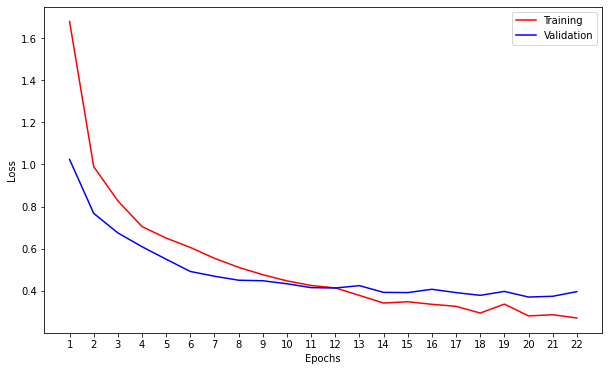

In [ ]:
# plot the training and validation losses
epochs = range(1, len(loss)+1)

fig1 = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,validation_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.legend()

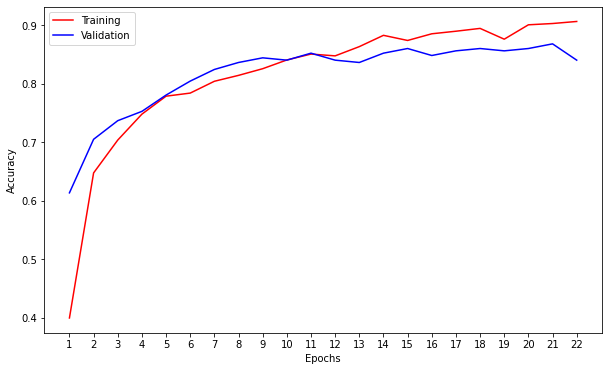

In [ ]:
# plot the training and validation accuracy
epochs = range(1, len(accuracy)+1)

fig2 = plt.figure(figsize=(10,6))
plt.plot(epochs,accuracy,c="red",label="Training")
plt.plot(epochs,validation_accuracy,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xticks(epochs)
plt.legend()

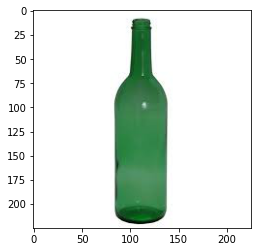

In [ ]:
import matplotlib.pyplot as plt

x = plt.imread('/content/bottle.jpeg')
plt.imshow(x)
plt.show()

In [ ]:
x.shape

(225, 225, 3)

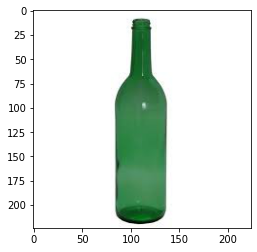

In [ ]:
from keras_preprocessing import image
x = image.load_img('/content/bottle.jpeg', target_size= (224,224,3))
plt.imshow(x)
plt.show()

In [ ]:
x = image.img_to_array(x)
x.shape

(224, 224, 3)

In [ ]:
x = x.reshape(1,224,224,3)
x.shape

(1, 224, 224, 3)

In [ ]:
from keras.applications.vgg16 import preprocess_input
x = preprocess_input(x)
y = model.predict(x)
classes=['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
classes[np.argmax(y)]

'glass'

In [ ]:
model.save('classifier.hdf5')

In [ ]:
!cp /content/classifier.hdf5 /content/gdrive/MyDrive/Colab\ Notebooks/AI\ course\ smartknower/major\ project